<a href="https://colab.research.google.com/github/snvssk/data298A/blob/saidev/VGG16_WorkingDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## https://www.youtube.com/watch?v=mRVTKrbRYi0

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
# import the libraries as shown below
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
#from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

## Collect data from Roboflow with size [224,224] for VGG

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gZ889YZoIUvo6Bvc6lsU")
project = rf.workspace("sjsu").project("building-image")
dataset = project.version(15).download("coco")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 8.8 MB/s 
     |████████████████████████████████| 178 kB 56.0 MB/s 
     |████████████████████████████████| 1.1 MB 47.6 MB/s 
     |████████████████████████████████| 67 kB 7.3 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 138 kB 61.2 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.15-py3-none-any.whl size=24936 sha256=7ebde16abe51b3de4fa8e2d3c4e17ff16ffbc8334fa16b9a29c7a4cd36ff44e3
  Stored in directory: /root/.cache/pip/wheels/13/e0/a3/fe183fffc3972cb9264e800763d4bbfff80d5309137c410217
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=b05de1f0acf4b1b38013d51efc32588ba9621486db0258442c85bb0a40eb1943
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Building-Image-15 in coco:: 100%|██████████| 512/512 [00:00<00:00, 887.30it/s] 


## When data collected it stored as individual jpg image so creating 14 folders as I have total 14 class labels and putting corresponding image file to its class labels for train dataset.

In [ ]:
import json
json_path= '/content/Building-Image-15/train/_annotations.coco.json'
file = open(json_path)
json_data= json.load(file)
print(json_data)
categories = (json_data['categories'])
annotations= (json_data['annotations'])
image_paths = json_data['images']

In [ ]:
image_id_map = {}
for image_path in image_paths:
  #print(image_path)
  image_id_map[image_path['id']] = image_path['file_name']
print(image_id_map)

{0: 'MountainView_51_png.rf.05f18a73eb3b1f3fb20c03d358172bb5.jpg', 1: 'MountainView_46_png.rf.0fc3ea1f306dad408706d08104c8663a.jpg', 2: 'Screen-Shot-2022-06-23-at-11-55-17-AM_png.rf.10f1edc650df8d52744c670b34ae61e0.jpg', 3: 'MountainView_32_png.rf.125e081d2cbecdd2fbbf9955618199e0.jpg', 4: 'MountainView_13_png.rf.0132eba2005f6d4e019c5ac4c17a26fc.jpg', 5: 'Screen-Shot-2022-06-23-at-6-08-38-PM_png.rf.008e15fe3dff17e0ff230bf8f1852355.jpg', 6: 'MountainView_3_png.rf.00da9ad5b7eeb330c8a921d7dbedacf3.jpg', 7: 'MountainView_7_png.rf.16a3f882fcf2356e3e48fffd35720c22.jpg', 8: 'MountainView_3_png.rf.01ed7d4bd9ea01104b1f73f5b0b2c09c.jpg', 9: 'Screen-Shot-2022-06-23-at-6-09-15-PM_png.rf.0ba994e91a39cd9db4212e12b9dd3916.jpg', 10: 'Screen-Shot-2022-06-23-at-6-14-12-PM_png.rf.00965a12c310eb105a9a85e2d3c8ef78.jpg', 11: 'MountainView_35_png.rf.04d4fc9244a3abfa1e4c854638134f61.jpg', 12: 'MountainView_14_png.rf.03ae55ddfb164fad990a988de9553c9b.jpg', 13: 'Screen-Shot-2022-06-23-at-6-16-51-PM_png.rf.002b8c4

In [ ]:
print(categories)

[{'id': 0, 'name': 'Building-Roof', 'supercategory': 'none'}, {'id': 1, 'name': 'Building-Roof', 'supercategory': 'Building-Roof'}, {'id': 2, 'name': 'Commercial-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 3, 'name': 'Commercial-Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 4, 'name': 'Construction-Area', 'supercategory': 'Building-Roof'}, {'id': 5, 'name': 'Flat Roof', 'supercategory': 'Building-Roof'}, {'id': 6, 'name': 'Land', 'supercategory': 'Building-Roof'}, {'id': 7, 'name': 'Playground', 'supercategory': 'Building-Roof'}, {'id': 8, 'name': 'Slope-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 9, 'name': 'Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 10, 'name': 'Solar-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 11, 'name': 'Solar-Pannel-Ground', 'supercategory': 'Building-Roof'}, {'id': 12, 'name': 'Solar-Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 13, 'name': 'TreeShading-Slope-Roof', 'supercategory': 'Building-Roof'}, {'

In [ ]:
import os
base_train_path = '/content/Building-Image-15/train/' 
#base_test_path = '/content/Building-Image-15/test/' 
category_map = {}
for category in categories:
  if category['supercategory']!= 'none':
    print(category)
    os.mkdir(base_train_path + category['name'])
    #os.mkdir(base_test_path + category['name'])
    category_map[category['id']] = category['name'] 

category_map

{'id': 1, 'name': 'Building-Roof', 'supercategory': 'Building-Roof'}
{'id': 2, 'name': 'Commercial-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 3, 'name': 'Commercial-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 4, 'name': 'Construction-Area', 'supercategory': 'Building-Roof'}
{'id': 5, 'name': 'Flat Roof', 'supercategory': 'Building-Roof'}
{'id': 6, 'name': 'Land', 'supercategory': 'Building-Roof'}
{'id': 7, 'name': 'Playground', 'supercategory': 'Building-Roof'}
{'id': 8, 'name': 'Slope-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 9, 'name': 'Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 10, 'name': 'Solar-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 11, 'name': 'Solar-Pannel-Ground', 'supercategory': 'Building-Roof'}
{'id': 12, 'name': 'Solar-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 13, 'name': 'TreeShading-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 14, 'name': 'Unknownshape-Roof', 'supercategory': 'Building-Roof'}


{1: 'Building-Roof',
 2: 'Commercial-Flat-Roof',
 3: 'Commercial-Slope-Roof',
 4: 'Construction-Area',
 5: 'Flat Roof',
 6: 'Land',
 7: 'Playground',
 8: 'Slope-Flat-Roof',
 9: 'Slope-Roof',
 10: 'Solar-Flat-Roof',
 11: 'Solar-Pannel-Ground',
 12: 'Solar-Slope-Roof',
 13: 'TreeShading-Slope-Roof',
 14: 'Unknownshape-Roof'}

In [ ]:
for images in annotations:
  print(images)
  source_path = base_train_path + image_id_map[images['id']]
  destination_path = base_train_path + category_map[images['category_id']]+"/" + image_id_map[images['id']]
  #print(source_path)
  #print(destination_path)
  os.rename(source_path, destination_path)   

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Building-Image-15/train'
valid_path = '/content/Building-Image-15/test'


In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [ ]:
#prediction = Dense(len(folders), activation='softmax')(x)
prediction = Dense(14, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
"""# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)"""

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Building-Image-15/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 401 images belonging to 14 classes.


### Creating folders for test data set and putting coresponding image to its class labels.

In [ ]:
import json
json_path_test= '/content/Building-Image-15/test/_annotations.coco.json'
file = open(json_path_test)

json_data_test= json.load(file)
print(json_data_test)
categories_test = (json_data_test['categories'])
annotations_test= (json_data_test['annotations'])
image_paths_test = json_data_test['images']

In [ ]:
image_id_map_test = {}
for image_path in image_paths_test:
  #print(image_path)
  image_id_map_test[image_path['id']] = image_path['file_name']

print(image_id_map_test)

{0: 'Screen-Shot-2022-06-22-at-10-28-31-PM_png.rf.009bd0586670f19855814c3e9f930787.jpg', 1: 'Screen-Shot-2022-06-22-at-9-20-30-PM_png.rf.08118c81d188dce2451dd397f50987d0.jpg', 2: 'Screen-Shot-2022-06-22-at-5-17-36-PM_png.rf.0a4bdbc876ab43eb2f73d22f8d72f130.jpg', 3: 'Screen-Shot-2022-06-22-at-7-02-40-PM_png.rf.0c48a240da8c407c67aa1296d18de3a0.jpg', 4: 'Screen-Shot-2022-06-22-at-6-59-23-PM_png.rf.0f2a42dda9e3b31f92500e7af4c705fd.jpg', 5: 'Screen-Shot-2022-06-22-at-10-31-07-PM_png.rf.12afd9d62f2dbc461265f420edc001fe.jpg', 6: 'Screen-Shot-2022-06-22-at-9-26-24-PM_png.rf.140686464eccb60fa28fd8ee472d13db.jpg', 7: 'Screen-Shot-2022-06-22-at-9-36-09-PM_png.rf.15c40e0ad203f8abc7bbd2f4e438a427.jpg', 8: 'Screen-Shot-2022-06-22-at-7-01-04-PM_png.rf.16cbd3d9ddcec8817cc8667a3785db6a.jpg', 9: 'Screen-Shot-2022-06-22-at-6-54-35-PM_png.rf.1b36d3d94924be0f008ea3f979cec98c.jpg', 10: 'Screen-Shot-2022-06-22-at-6-57-59-PM_png.rf.1d208a4d7fc500d403a2a6cfad78950b.jpg', 11: 'Screen-Shot-2022-06-22-at-7-00-09-

In [ ]:
print(categories_test)

[{'id': 0, 'name': 'Building-Roof', 'supercategory': 'none'}, {'id': 1, 'name': 'Building-Roof', 'supercategory': 'Building-Roof'}, {'id': 2, 'name': 'Commercial-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 3, 'name': 'Commercial-Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 4, 'name': 'Construction-Area', 'supercategory': 'Building-Roof'}, {'id': 5, 'name': 'Flat Roof', 'supercategory': 'Building-Roof'}, {'id': 6, 'name': 'Land', 'supercategory': 'Building-Roof'}, {'id': 7, 'name': 'Playground', 'supercategory': 'Building-Roof'}, {'id': 8, 'name': 'Slope-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 9, 'name': 'Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 10, 'name': 'Solar-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 11, 'name': 'Solar-Pannel-Ground', 'supercategory': 'Building-Roof'}, {'id': 12, 'name': 'Solar-Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 13, 'name': 'TreeShading-Slope-Roof', 'supercategory': 'Building-Roof'}, {'

In [ ]:
import os
base_train_path_test = '/content/Building-Image-15/test/'
category_map_test = {}
for category in categories:
  if category['supercategory']!= 'none':
    print(category)
    os.mkdir(base_train_path_test + category['name'])
    category_map_test[category['id']] = category['name'] 

category_map_test

{'id': 1, 'name': 'Building-Roof', 'supercategory': 'Building-Roof'}
{'id': 2, 'name': 'Commercial-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 3, 'name': 'Commercial-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 4, 'name': 'Construction-Area', 'supercategory': 'Building-Roof'}
{'id': 5, 'name': 'Flat Roof', 'supercategory': 'Building-Roof'}
{'id': 6, 'name': 'Land', 'supercategory': 'Building-Roof'}
{'id': 7, 'name': 'Playground', 'supercategory': 'Building-Roof'}
{'id': 8, 'name': 'Slope-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 9, 'name': 'Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 10, 'name': 'Solar-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 11, 'name': 'Solar-Pannel-Ground', 'supercategory': 'Building-Roof'}
{'id': 12, 'name': 'Solar-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 13, 'name': 'TreeShading-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 14, 'name': 'Unknownshape-Roof', 'supercategory': 'Building-Roof'}


{1: 'Building-Roof',
 2: 'Commercial-Flat-Roof',
 3: 'Commercial-Slope-Roof',
 4: 'Construction-Area',
 5: 'Flat Roof',
 6: 'Land',
 7: 'Playground',
 8: 'Slope-Flat-Roof',
 9: 'Slope-Roof',
 10: 'Solar-Flat-Roof',
 11: 'Solar-Pannel-Ground',
 12: 'Solar-Slope-Roof',
 13: 'TreeShading-Slope-Roof',
 14: 'Unknownshape-Roof'}

In [ ]:
for images in annotations_test:
  print(images)
  source_path_test = base_train_path_test + image_id_map_test[images['id']]
  destination_path_test = base_train_path_test + category_map_test[images['category_id']]+"/" + image_id_map_test[images['id']]
  print(source_path_test)
  print(destination_path_test)
  os.rename(source_path_test, destination_path_test)  

In [ ]:
rm -rf '/content/Building-Image-15/test/.ipynb_checkpoints'

In [ ]:
test_set = test_datagen.flow_from_directory('/content/Building-Image-15/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 104 images belonging to 14 classes.


In [ ]:
len(training_set)


13

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
import PIL
print(PIL.PILLOW_VERSION)

7.1.2


PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100, #Initially keep 2 epoc size as it takes long to train
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
13/13 [==============================] - 256s 20s/step - loss: 1.7060 - accuracy: 0.4414 - val_loss: 3.2174 - val_accuracy: 0.4135
Epoch 2/100
13/13 [==============================] - 257s 20s/step - loss: 1.2485 - accuracy: 0.5736 - val_loss: 3.0787 - val_accuracy: 0.4615
Epoch 3/100
13/13 [==============================] - 255s 20s/step - loss: 1.0423 - accuracy: 0.6459 - val_loss: 3.1509 - val_accuracy: 0.5577
Epoch 4/100
13/13 [==============================] - 261s 20s/step - loss: 0.9142 - accuracy: 0.6883 - val_loss: 3.2037 - val_accuracy: 0.5769
Epoch 5/100
13/13 [==============================] - 255s 21s/step - loss: 0.7678 - accuracy: 0.7606 - val_loss: 3.4797 - val_accuracy: 0.3173
Epoch 6/100
13/13 [==============================] - 254s 20s/step - loss: 0.7308 - accuracy: 0.7481 - val_loss: 3.1759 - val_accuracy: 0.5865
Epoch 7/100
13/13 [==============================] - 256s 20s/step - loss: 0.6969 - accuracy: 0.7556 - val_loss: 3.3502 - val_accuracy: 0.6154

### When we mention validation_split as fit parameter while fitting DL model, it splits data into two parts for every epoch i.e. training data and validation data. It trains the model on training data and validate the model on validation data by checking its loss and accuracy.

### Usually with every epoch increasing, loss goes lower and accuracy goes higher. But with val_loss and val_acc, many cases can be possible:

### val_loss starts increasing, val_acc starts decreasing(means model is cramming values not learning)

### val_loss starts increasing, val_acc also increases.(could be case of overfitting or diverse probability values in cases softmax is used in output layer)

### val_loss starts decreasing, val_acc starts increasing(Correct, means model build is learning and working fine)

In [ ]:
import matplotlib.pyplot as plt

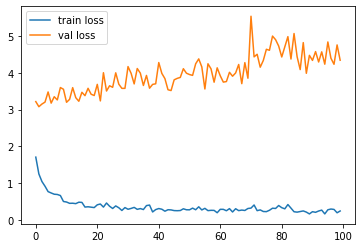

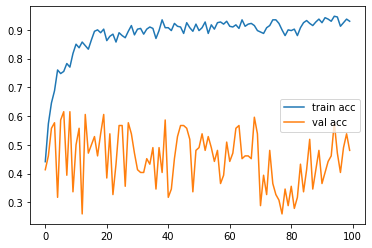

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from keras.models import load_model
model.save('model_vgg16.h5')

## After training test the model to get y_hat

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[1.4274313e-12, 5.4014176e-10, 8.9582281e-06, ..., 4.8303362e-02,
        1.2602622e-03, 2.4430349e-09],
       [3.5677014e-14, 5.9162863e-13, 1.4145905e-07, ..., 9.2710188e-04,
        1.0639127e-06, 4.1427128e-14],
       [9.9482597e-13, 5.3172542e-05, 1.2403705e-06, ..., 8.1664696e-03,
        5.8573465e-07, 5.4690185e-12],
       ...,
       [5.5760106e-13, 5.5287447e-10, 7.1538279e-06, ..., 1.0006339e-03,
        8.8799894e-01, 9.1363517e-10],
       [1.8660932e-12, 1.6322385e-06, 2.7616619e-07, ..., 5.3959715e-01,
        2.7482878e-04, 1.0306441e-10],
       [6.1011038e-14, 6.1720550e-07, 3.5111263e-08, ..., 2.2834660e-02,
        1.3910017e-06, 3.9830413e-14]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
print()

## Total 72 image we had in test set 


In [ ]:

#y_pred(test_set[0])

In [ ]:
from keras.models import load_model
from keras.preprocessing import image

In [ ]:
model=load_model('/content/model_vgg16.h5')

In [ ]:
from keras.applications.vgg16 import preprocess_input
#img_data

## Passing image from user to classify roof


In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

Input image shape: (1, 224, 224, 3)


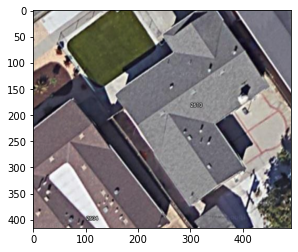

In [ ]:
"""img_path = '/content/Building-Image-15/user_test/Screen Shot 2022-06-22 at 10.30.54 PM.png'
img=image.load_img(img_path,target_size=(224,224))
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X=preprocess_input(X)
print('Input image shape:', X.shape)
my_image= imread(img_path)
imshow(my_image)"""

In [ ]:
"""a=(model.predict(X))
#print(a)
a=np.argmax(model.predict(X), axis=1)
print(a)"""

[11]


Input image shape: (1, 224, 224, 3)


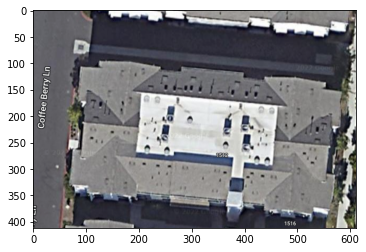

In [ ]:
img_path = '/content/Building-Image-15/user_test/Screen Shot 2022-06-22 at 6.56.57 PM.png'
img=image.load_img(img_path,target_size=(224,224))
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X=preprocess_input(X)
print('Input image shape:', X.shape)
my_image= imread(img_path)
imshow(my_image)

In [ ]:
a=(model.predict(X))
#print(a)
a=np.argmax(model.predict(X), axis=1)
print(category_map[a[0]])

Slope-Flat-Roof


Input image shape: (1, 224, 224, 3)
Solar-Pannel-Ground


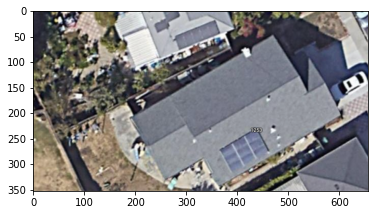

In [ ]:
img_path = '/content/Building-Image-15/user_test/Screen Shot 2022-06-22 at 6.58.50 PM.png'
img=image.load_img(img_path,target_size=(224,224))
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X=preprocess_input(X)
print('Input image shape:', X.shape)
my_image= imread(img_path)
imshow(my_image)

a=(model.predict(X))
#print(a)
a=np.argmax(model.predict(X), axis=1)
print(category_map[a[0]])

Input image shape: (1, 224, 224, 3)
Slope-Flat-Roof


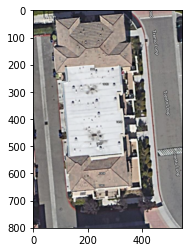

In [ ]:
img_path = '/content/Building-Image-15/user_test/Screen Shot 2022-06-22 at 6.54.28 PM.png'
img=image.load_img(img_path,target_size=(224,224))
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X=preprocess_input(X)
print('Input image shape:', X.shape)
my_image= imread(img_path)
imshow(my_image)

a=(model.predict(X))
#print(a)
a=np.argmax(model.predict(X), axis=1)
print(category_map[a[0]])

Input image shape: (1, 224, 224, 3)
Solar-Pannel-Ground


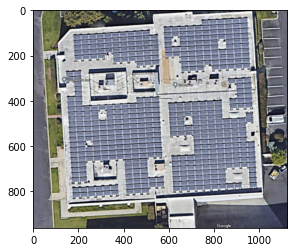

In [ ]:
img_path = '/content/Building-Image-15/user_test/Screen Shot 2022-06-22 at 6.52.56 PM.png'
img=image.load_img(img_path,target_size=(224,224))
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X=preprocess_input(X)
print('Input image shape:', X.shape)
my_image= imread(img_path)
imshow(my_image)

a=(model.predict(X))
#print(a)
a=np.argmax(model.predict(X), axis=1)
print(category_map[a[0]])

## Other: https://www.youtube.com/watch?v=mjk4vDYOwq0